<a href="https://colab.research.google.com/github/VagnerProjects/Machine-Learning-Jupyter/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando bibliotecas de DeepLearning

In [ ]:
!pip install keras
!pip install tensorflow

Importando as bibliotecas

In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Crinado os mnodelos de teste e de treinamento (Fundamentos do Machine Learning)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Apresentando a quantidade de imagens de treinamento e seus formatos
Apresentando a quantidade de labels para teste

In [ ]:
print(train_images.shape)
len(test_labels)

(60000, 28, 28)


10000

Salvando o nome das labels

In [ ]:

#Names
"""Camisetas, Calça, suéter, Vestidos, Casaco, Sandálias, Camisas, tenis, Bolsa, Botas"""
"""'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']"""
class_names =["Camisetas", "Calça", "Suéter", "Vestidos", "Casaco", "Sandálias", "Camisas", "tenis", "Bolsa", "Botas"]



Dividindo as imagens pelo total de bytes

In [ ]:
train_images = train_images /255.0
test_images = test_images /255.0

Apresentando as primeiras 25 imagens e organizando suas labels

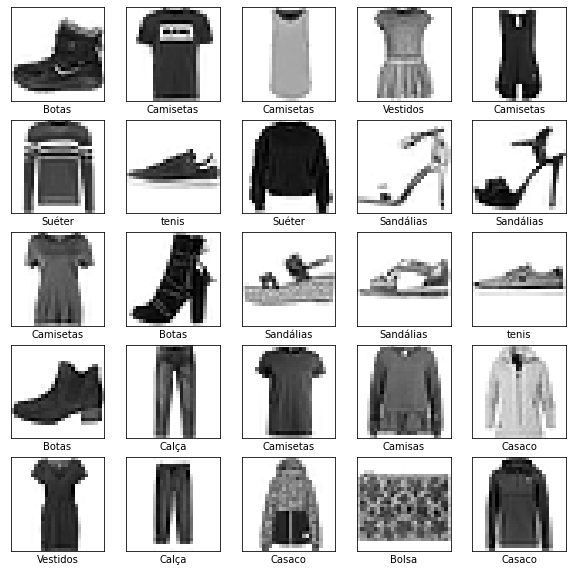

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.savefig('Treinamento.png')
plt.show()

Criando a rede neural com 128 neuronios e dividindo os dados em uma matriz 28x28, modo de ativação ReLu
Modo softmax para pontuar até 10 modelos, para acertos a sáida é 1
loss - como a rede neural esta se saindo em %
accuracy - o que mais importa, a taxa de imagens com previsões corretas em %

In [ ]:
    model = keras.Sequential([
                           keras.layers.Flatten( input_shape=(28
                            ,28)),
                           keras.layers.Dense(128, activation="relu"),
                           keras.layers.Dense(10, activation="softmax")
                          ])

 model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 

Treinando a rede neural com as imagens e labels de treinamento
epochs - quantidad de vezes que a rede neural sera treinada

In [ ]:
 model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8962
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8988
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9049
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2476 - accuracy: 0.9073
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2398 - accuracy: 0.9099
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9137
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2237 - accuracy: 0.9174
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9175
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2141 - accuracy: 0.9195
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.203

O resultado do teste, compare ao treinamento

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3440 - accuracy: 0.8911

Test accuracy: 0.8910999894142151


A previsão de 10 imagens

In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([4.8263182e-12, 9.6460201e-11, 1.4145721e-12, 2.3068737e-10,
       1.2427780e-11, 2.4779720e-05, 1.0244543e-10, 6.3038263e-03,
       8.1416021e-09, 9.9367142e-01], dtype=float32)

Jogando uma imagem para a maquina dizer qual o num de label
abaixo aparece a label correta, veja se a rede neural acertou

In [ ]:
print(np.argmax(predictions[0]))
test_labels[0]

9


9

Nestas funções. apresentaremos imagens para a rede neural, e ela devera mostrar qual imagem a gente mostrou, e qual a label correspondentre
ao lado há um gráfico mostrando se acertou ou não, a label também conta com a % que a rede neural acha que é tal imagem, se ela acerta fica em azul, se erra fica em vermelho

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

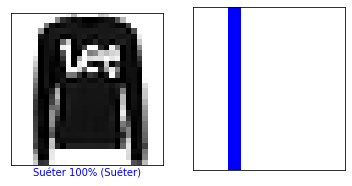

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Aqui apresentaremos 15 imagens para testare a rede neural, e mostraremos o seu desempenho

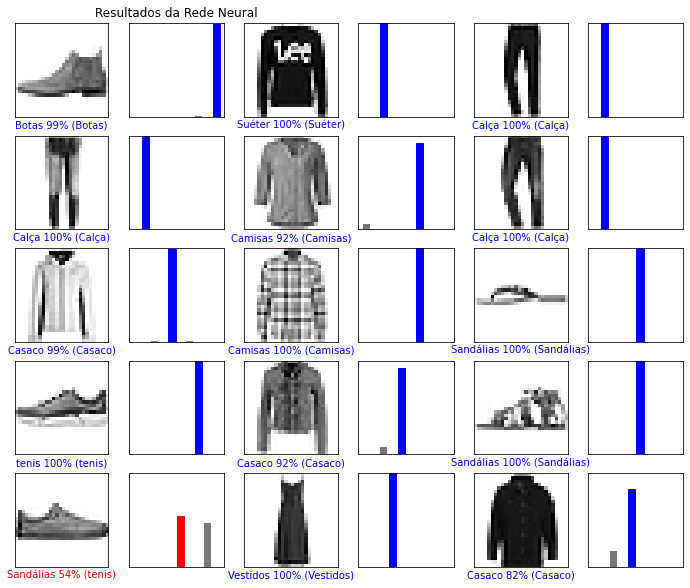

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  
  if i <= 0:
    plt.title("Resultados da Rede Neural")
plt.show()

Treine mais a rede neural na célula de treinamento (fit) para ela ter um desempenho melhor